In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from config_algorithms import ACOConfig
from oqat import OQATClassifier, OQATModel
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
#  plot confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [21]:
SEED = 42

def pretty_print_confusion_matrix(confusion_matrix):
    for row in confusion_matrix:
        print(row)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    # print(cm)

    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True, cmap=cmap)

    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def accuracies_from_confusion_matrix(cm: list[list[int]], classes=list[str]) -> list[float]:
    accuracies = []
    for i in range(len(cm)):
        correct = cm[i][i]
        total = sum(cm[i])
        accuracies.append(correct / total)
    return accuracies

def precisions_from_confusion_matrix(cm: list[list[int]]) -> list[float]:
    precisions = []
    for i in range(len(cm)):
        correct = cm[i][i]
        total = sum([cm[j][i] for j in range(len(cm))])
        precisions.append(correct / total)
    return precisions

def recalls_from_confusion_matrix(cm: list[list[int]]) -> list[float]:
    recalls = []
    for i in range(len(cm)):
        correct = cm[i][i]
        total = sum(cm[i])
        recalls.append(correct / total)
    return recalls

def f1s_from_confusion_matrix(cm: list[list[int]]) -> list[float]:
    precisions = precisions_from_confusion_matrix(cm)
    recalls = recalls_from_confusion_matrix(cm)
    f1s = []
    for i in range(len(cm)):
        f1s.append(2 * precisions[i] * recalls[i] / (precisions[i] + recalls[i]))
    return f1s

def metrics_from_confusion_matrix(cm: list[list[int]], classes=list[str]) -> dict[str, dict[str, float]]:
    metrics = {c : {} for c in classes}
    accuracies = accuracies_from_confusion_matrix(cm, classes)
    precisions = precisions_from_confusion_matrix(cm)
    recalls = recalls_from_confusion_matrix(cm)
    f1s = f1s_from_confusion_matrix(cm)
    for i in range(len(classes)):
        metrics[classes[i]]['accuracy'] = accuracies[i]
        metrics[classes[i]]['precision'] = precisions[i]
        metrics[classes[i]]['recall'] = recalls[i]
        metrics[classes[i]]['f1'] = f1s[i]
    return metrics

In [3]:
# Read csv file and load it into a numpy array
df = pd.read_csv('datasets/UAs_emotions.csv')


# Drop first column (id)
df = df.drop(df.columns[0], axis=1)

# Remove duplicate rows
df = df.drop_duplicates()

# Split the data into X and y
# X is the first 12 columns
X = df.iloc[:, 0:12]
# y is the last 7 columns one hot encoded
y = df.iloc[:, 12:19]
# transfor from one hot encoded to a single column
y_str = y.idxmax(axis=1)


# Define the feature type for each column (discrete or continuous)
column_names = X.columns.to_list()
column_types = ['cat', 'cat', 'cat' , 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']

# transform the dataframes into a numpy array
X = X.values
y_str = y_str.values

print('X shape: ', X.shape)
print('y shape: ', y_str.shape)
print(X[0], y_str[0])
print(X[100], y_str[100])
print(X[101], y_str[101])


X shape:  (241, 12)
y shape:  (241,)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Enojo
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.] Disgusto
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.] Disgusto


In [4]:
# Transform the string labels into integers
y = preprocessing.LabelEncoder().fit_transform(y_str)
conversion = dict(zip(y, y_str))
print(conversion)


{2: 'Enojo', 1: 'Disgusto', 4: 'Miedo', 3: 'Felicidad', 6: 'Tristeza', 5: 'Sorpresa', 0: 'Desprecio'}


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (192, 12)
y_train shape:  (192,)
X_test shape:  (49, 12)
y_test shape:  (49,)


In [6]:
# Balance the training set

print("Before SMOTE")
print(pd.Series(y_train).value_counts())
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)
# print("After SMOTE")
# print(pd.Series(y_train).value_counts())

Before SMOTE
5    43
1    42
2    38
4    23
3    21
6    18
0     7
dtype: int64


In [7]:
cfm_labels = [conversion[i] for i in range(7)]

Decision Tree
[1 0 0 1 0 0 0]
[0 2 3 0 0 1 0]
[0 4 3 0 4 0 0]
[3 2 0 0 0 0 1]
[0 3 4 0 1 3 0]
[0 0 2 2 2 2 0]
[2 2 0 0 0 1 0]
Score:  0.1836734693877551


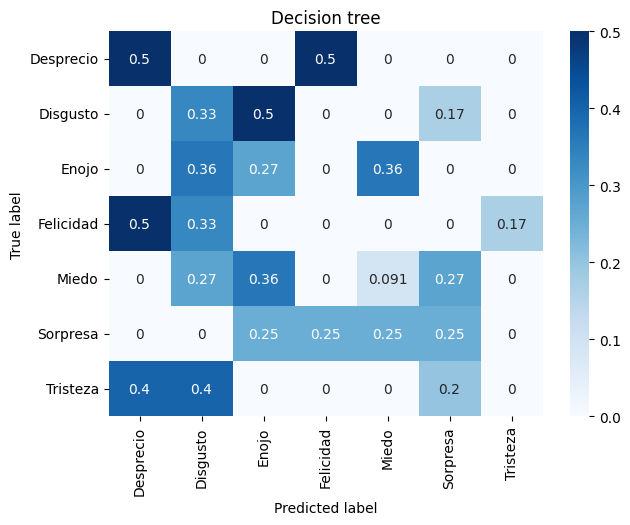

{'Desprecio': {'accuracy': 0.5, 'precision': 0.16666666666666666, 'recall': 0.5, 'f1': 0.25}, 'Disgusto': {'accuracy': 0.3333333333333333, 'precision': 0.15384615384615385, 'recall': 0.3333333333333333, 'f1': 0.21052631578947367}, 'Enojo': {'accuracy': 0.2727272727272727, 'precision': 0.25, 'recall': 0.2727272727272727, 'f1': 0.2608695652173913}, 'Felicidad': {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': nan}, 'Miedo': {'accuracy': 0.09090909090909091, 'precision': 0.14285714285714285, 'recall': 0.09090909090909091, 'f1': 0.1111111111111111}, 'Sorpresa': {'accuracy': 0.25, 'precision': 0.2857142857142857, 'recall': 0.25, 'f1': 0.26666666666666666}, 'Tristeza': {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': nan}}


/var/folders/g9/sx6f09ds4hg9xd9bz13w3q280000gn/T/ipykernel_945/2091938016.py:56: RuntimeWarning: invalid value encountered in scalar divide
  f1s.append(2 * precisions[i] * recalls[i] / (precisions[i] + recalls[i]))


In [22]:
# Run a classification tree algorithm from sklearn
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Decision Tree")
pretty_print_confusion_matrix(cm_tree)
print("Score: ", tree_model.score(X_test, y_test))
plot_confusion_matrix(cm_tree, classes=cfm_labels, normalize=True, title='Decision tree')
metrics = metrics_from_confusion_matrix(cm_tree, classes=cfm_labels)
print(metrics)
# text_repr = tree.export_text(tree_model)
# print(text_repr)

In [9]:
# # Run the OQAT algorithm
aco_config = ACOConfig(algorithm="vertex-ac", cycles=20, ants=10, alpha=1, rho=0.99, tau_max=6., tau_min=0.01)
classifier = OQATClassifier(collision_strategy="best_score", null_strategy="weighted", heuristic="aco", heuristic_config=aco_config)
classifier.fit(X_train, y_train, column_names, column_types, validation_split=0.2, random_state=SEED)
print(classifier.model)

Model for class 0 created
Score: 1.0
Model for class 1 created
Score: 0.7692307692307693
Model for class 2 created
Score: 0.7435897435897436
Model for class 3 created
Score: 0.9487179487179487
Model for class 4 created
Score: 0.8205128205128205
Model for class 5 created
Score: 0.8461538461538461
Model for class 6 created
Score: 0.7692307692307693
{0: {'oqat_model': (([AU4=0.0]) ∧ ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=0.0]) ∧ ([AU5=0.0]) ∧ ([AU6=0.0]) ∧ ([AU1=0.0] ∨ [AU20=1.0] ∨ [AU26=1.0]) ∧ ([AU12=1.0] ∨ [AU17=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=0.0]) ∧ ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=0.0]) ∧ ([AU12=1.0] ∨ [AU2=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=1.0] ∨ [AU20=0.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=1.0] ∨ [AU15=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])

In [10]:
for learning_class, model in classifier.model.items():
    print("Learning class: ", learning_class)
    print("Score: ", model['score'])
    print("Model: ", model['oqat_model'])

Learning class:  0
Score:  1.0
Model:  (([AU4=0.0]) ∧ ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=0.0]) ∧ ([AU5=0.0]) ∧ ([AU6=0.0]) ∧ ([AU1=0.0] ∨ [AU20=1.0] ∨ [AU26=1.0]) ∧ ([AU12=1.0] ∨ [AU17=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=0.0]) ∧ ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=0.0]) ∧ ([AU12=1.0] ∨ [AU2=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=1.0] ∨ [AU20=0.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=1.0] ∨ [AU15=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=0.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=1.0]) ∧ ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0]))
Lea

In [11]:
classifier.collision_strategy = "None"
classifier.null_strategy = "None"
y_pred_set = classifier.predict(X_test, column_names)
print(y_pred_set)

[-1, -1, 2, 2, [0, 1, 2, 3, 4], -1, 1, [2, 4, 5], -1, -1, 2, [1, 4, 5], [2, 5, 6], [1, 2], -1, -1, [3, 5], [1, 3], 1, 4, [5, 6], 6, [1, 2], [5, 6], [3, 5], -1, -1, -1, -1, 1, [2, 3, 5], -1, [1, 2, 3, 4], 5, [1, 2, 3, 4], -1, 4, [1, 4, 5], [2, 4, 5], -1, [0, 1], [2, 3, 5], -1, [1, 2, 3, 4, 5, 6], [1, 2, 4, 5], 5, [1, 5, 6], 2, -1]


[0, 3, 2, 2, 0, 0, 1, 5, 0, 4, 2, 5, 5, 1, 6, 6, 3, 3, 1, 4, 5, 6, 1, 5, 3, 0, 0, 3, 4, 1, 3, 6, 3, 5, 3, 0, 4, 5, 5, 0, 0, 3, 0, 3, 5, 5, 5, 2, 3]
[2, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 2, 0, 1, 0]
[1, 2, 3, 0, 1, 2, 2]
[0, 1, 0, 4, 0, 0, 1]
[3, 0, 1, 1, 1, 4, 1]
[0, 0, 0, 3, 2, 3, 0]
[2, 1, 0, 1, 0, 1, 0]
Score:  0.2857142857142857


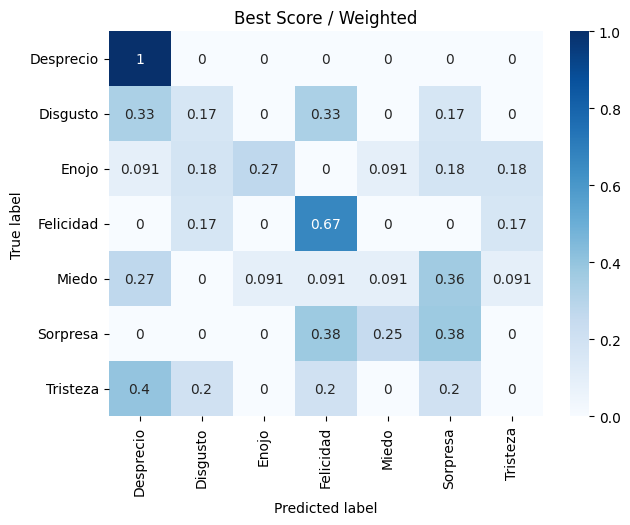

ZeroDivisionError: float division by zero

In [27]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "weighted"
y_pred_bs_w = classifier.predict(X_test, column_names)
print(y_pred_bs_w)
cm_bs_w = classifier.confusion_matrix(y_pred_bs_w, y_test)
pretty_print_confusion_matrix(cm_bs_w)
print("Score: ", classifier.score(y_pred_bs_w, y_test))
plot_confusion_matrix(np.array(cm_bs_w), classes=cfm_labels, normalize=True, title='Best Score / Weighted')
metrics = metrics_from_confusion_matrix(cm_bs_w, classes=cfm_labels)
print(metrics)

[0, 3, 2, 2, 0, 1, 1, 5, 2, 2, 2, 5, 5, 1, 6, 6, 3, 3, 1, 4, 5, 6, 1, 5, 3, 1, 3, 3, 4, 1, 3, 6, 3, 5, 3, 4, 4, 5, 5, 3, 0, 3, 3, 3, 5, 5, 5, 2, 1]
[1, 0, 0, 1, 0, 0, 0]
[1, 1, 0, 3, 0, 1, 0]
[0, 2, 3, 0, 2, 2, 2]
[0, 1, 0, 4, 0, 0, 1]
[0, 2, 3, 1, 0, 4, 1]
[0, 0, 0, 3, 2, 3, 0]
[1, 2, 0, 1, 0, 1, 0]
Score:  0.24489795918367346


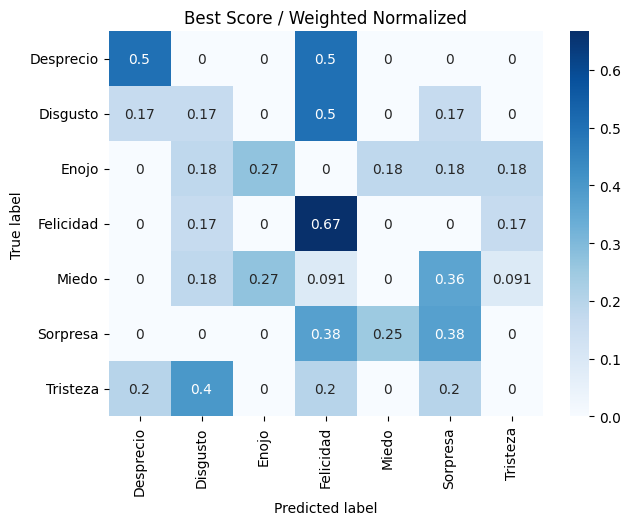

{'Desprecio': {'accuracy': 0.5, 'precision': 0.16666666666666666, 'recall': 0.5, 'f1': 0.25}, 'Disgusto': {'accuracy': 0.3333333333333333, 'precision': 0.15384615384615385, 'recall': 0.3333333333333333, 'f1': 0.21052631578947367}, 'Enojo': {'accuracy': 0.2727272727272727, 'precision': 0.25, 'recall': 0.2727272727272727, 'f1': 0.2608695652173913}, 'Felicidad': {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': nan}, 'Miedo': {'accuracy': 0.09090909090909091, 'precision': 0.14285714285714285, 'recall': 0.09090909090909091, 'f1': 0.1111111111111111}, 'Sorpresa': {'accuracy': 0.25, 'precision': 0.2857142857142857, 'recall': 0.25, 'f1': 0.26666666666666666}, 'Tristeza': {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': nan}}


/var/folders/g9/sx6f09ds4hg9xd9bz13w3q280000gn/T/ipykernel_945/2091938016.py:56: RuntimeWarning: invalid value encountered in scalar divide
  f1s.append(2 * precisions[i] * recalls[i] / (precisions[i] + recalls[i]))


In [25]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "weighted_normalized"
y_pred_bs_wn = classifier.predict(X_test, column_names)
print(y_pred_bs_wn)
cm_bs_wn = classifier.confusion_matrix(y_pred_bs_wn, y_test)
pretty_print_confusion_matrix(cm_bs_wn)
print("Score: ", classifier.score(y_pred_bs_wn, y_test))
plot_confusion_matrix(np.array(cm_bs_wn), classes=cfm_labels, normalize=True, title='Best Score / Weighted Normalized')
metrics = metrics_from_confusion_matrix(cm_bs_wn, classes=cfm_labels)
print(metrics)

[0, 0, 2, 2, 0, 6, 1, 5, 4, 4, 2, 5, 5, 1, 6, 6, 3, 3, 1, 4, 5, 6, 1, 5, 3, 6, 6, 0, 4, 1, 3, 6, 3, 5, 3, 6, 4, 5, 5, 0, 0, 3, 3, 3, 5, 5, 5, 2, 4]
[2, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 2, 0, 1, 0]
[0, 2, 3, 0, 1, 2, 3]
[0, 1, 0, 4, 0, 0, 1]
[0, 0, 1, 0, 3, 4, 3]
[1, 0, 0, 2, 2, 3, 0]
[1, 1, 0, 1, 0, 1, 1]
Score:  0.3469387755102041


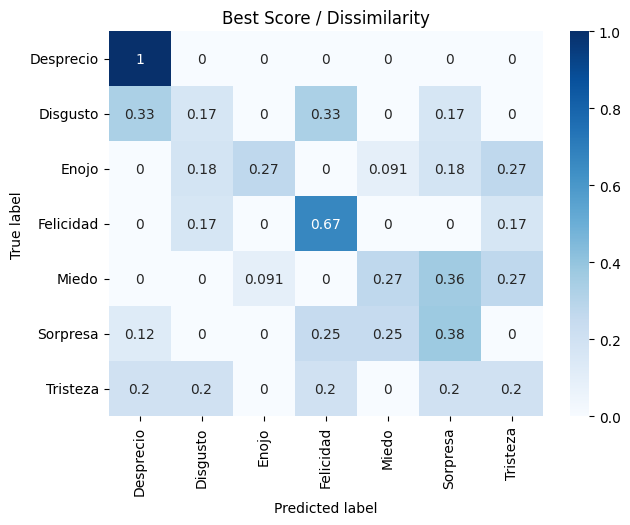

{'Desprecio': {'accuracy': 0.5, 'precision': 0.16666666666666666, 'recall': 0.5, 'f1': 0.25}, 'Disgusto': {'accuracy': 0.3333333333333333, 'precision': 0.15384615384615385, 'recall': 0.3333333333333333, 'f1': 0.21052631578947367}, 'Enojo': {'accuracy': 0.2727272727272727, 'precision': 0.25, 'recall': 0.2727272727272727, 'f1': 0.2608695652173913}, 'Felicidad': {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': nan}, 'Miedo': {'accuracy': 0.09090909090909091, 'precision': 0.14285714285714285, 'recall': 0.09090909090909091, 'f1': 0.1111111111111111}, 'Sorpresa': {'accuracy': 0.25, 'precision': 0.2857142857142857, 'recall': 0.25, 'f1': 0.26666666666666666}, 'Tristeza': {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': nan}}


/var/folders/g9/sx6f09ds4hg9xd9bz13w3q280000gn/T/ipykernel_945/2091938016.py:56: RuntimeWarning: invalid value encountered in scalar divide
  f1s.append(2 * precisions[i] * recalls[i] / (precisions[i] + recalls[i]))


In [26]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "dissimilarity"
y_pred_bs_d = classifier.predict(X_test, column_names)
print(y_pred_bs_d)
cm_bs_d = classifier.confusion_matrix(y_pred_bs_d, y_test)
pretty_print_confusion_matrix(cm_bs_d)
print("Score: ", classifier.score(y_pred_bs_d, y_test))
plot_confusion_matrix(np.array(cm_bs_d), classes=cfm_labels, normalize=True, title='Best Score / Dissimilarity')
metrics = metrics_from_confusion_matrix(cm_tree, classes=cfm_labels)
print(metrics)

[0, 3, 2, 2, 0, 0, 1, 5, 0, 4, 2, 4, 6, 1, 6, 6, 3, 3, 1, 4, 6, 6, 1, 6, 3, 0, 0, 3, 4, 1, 3, 6, 3, 5, 3, 0, 4, 4, 5, 0, 1, 3, 0, 3, 4, 5, 6, 2, 3]
[2, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 2, 0, 0, 1]
[1, 2, 3, 0, 1, 1, 3]
[0, 1, 0, 4, 0, 0, 1]
[3, 0, 1, 1, 4, 1, 1]
[0, 0, 0, 3, 2, 1, 2]
[2, 1, 0, 1, 0, 1, 0]
Score:  0.32653061224489793


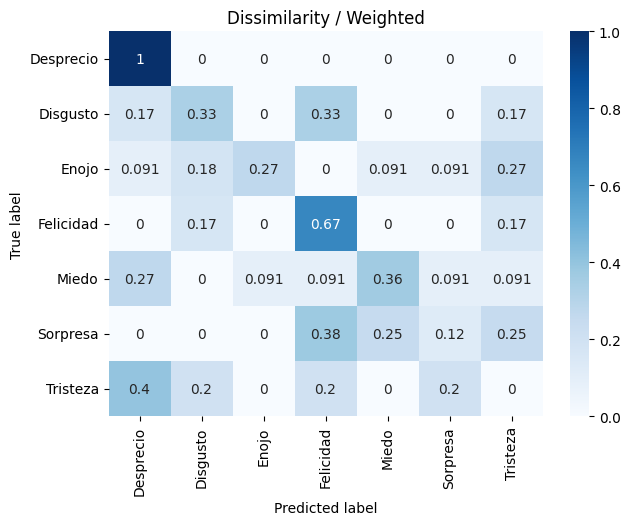

In [15]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "weighted"
y_pred_d_w = classifier.predict(X_test, column_names)
print(y_pred_d_w)
cm_d_w = classifier.confusion_matrix(y_pred_d_w, y_test)
pretty_print_confusion_matrix(cm_d_w)
print("Score: ", classifier.score(y_pred_d_w, y_test))
plot_confusion_matrix(np.array(cm_d_w), classes=cfm_labels, normalize=True, title='Dissimilarity / Weighted')

[0, 3, 2, 2, 0, 1, 1, 5, 2, 2, 2, 4, 6, 1, 6, 6, 3, 3, 1, 4, 6, 6, 1, 6, 3, 1, 3, 3, 4, 1, 3, 6, 3, 5, 3, 4, 4, 4, 5, 3, 1, 3, 3, 3, 4, 5, 6, 2, 1]
[1, 0, 0, 1, 0, 0, 0]
[0, 2, 0, 3, 0, 0, 1]
[0, 2, 3, 0, 2, 1, 3]
[0, 1, 0, 4, 0, 0, 1]
[0, 2, 3, 1, 3, 1, 1]
[0, 0, 0, 3, 2, 1, 2]
[1, 2, 0, 1, 0, 1, 0]
Score:  0.2857142857142857


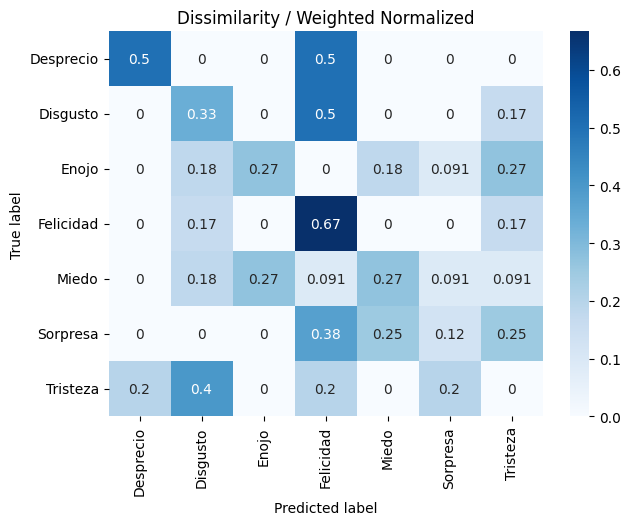

In [16]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "weighted_normalized"
y_pred_d_wn = classifier.predict(X_test, column_names)
print(y_pred_d_wn)
cm_d_wn = classifier.confusion_matrix(y_pred_d_wn, y_test)
pretty_print_confusion_matrix(cm_d_wn)
print("Score: ", classifier.score(y_pred_d_wn, y_test))
plot_confusion_matrix(np.array(cm_d_wn), classes=cfm_labels, normalize=True, title='Dissimilarity / Weighted Normalized')

[0, 0, 2, 2, 0, 6, 1, 5, 4, 4, 2, 4, 6, 1, 6, 6, 3, 3, 1, 4, 6, 6, 1, 6, 3, 6, 6, 0, 4, 1, 3, 6, 3, 5, 3, 6, 4, 4, 5, 0, 1, 3, 3, 3, 4, 5, 6, 2, 4]
[2, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 2, 0, 0, 1]
[0, 2, 3, 0, 1, 1, 4]
[0, 1, 0, 4, 0, 0, 1]
[0, 0, 1, 0, 6, 1, 3]
[1, 0, 0, 2, 2, 1, 2]
[1, 1, 0, 1, 0, 1, 1]
Score:  0.3469387755102041


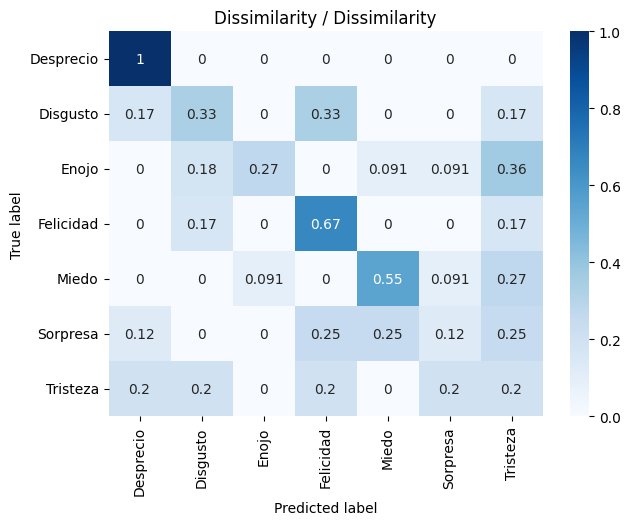

In [17]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "dissimilarity"
y_pred_d_d = classifier.predict(X_test, column_names)
print(y_pred_d_d)
cm_d_d = classifier.confusion_matrix(y_pred_d_d, y_test)
pretty_print_confusion_matrix(cm_d_d)
print("Score: ", classifier.score(y_pred_bs_d, y_test))
plot_confusion_matrix(np.array(cm_d_d), classes=cfm_labels, normalize=True, title='Dissimilarity / Dissimilarity')

In [18]:

for learning_class, model in classifier.model.items():
    print(f'Class: {learning_class}')
    print(f'Score: {model["score"]}')
    for i, clause in enumerate(model['oqat_model'].model.clauses):
        print(f'\t{model["cnf_weights"][i]: ^4} Clause: {clause}')

print(f'    X                                  y_test   bs / w    bs / wn   bs / d      d / w    d / wn    d / d   sets')
for i in range(len(y_test)):
    print(X_test[i], f'{y_test[i]: ^9}', f'{y_pred_bs_w[i]: ^9}', f'{y_pred_bs_wn[i]: ^9}', f'{y_pred_bs_d[i]: ^9}', f'{y_pred_d_w[i]: ^9}', f'{y_pred_d_wn[i]: ^9}', f'{y_pred_d_d[i]: ^9}', f'{y_pred_set[i]}')

Class: 0
Score: 1.0
	 50  Clause: ([AU4=0.0])
	 35  Clause: ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=0.0])
	 19  Clause: ([AU5=0.0])
	 11  Clause: ([AU6=0.0])
	 7   Clause: ([AU1=0.0] ∨ [AU20=1.0] ∨ [AU26=1.0])
	 6   Clause: ([AU12=1.0] ∨ [AU17=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0])
	 2   Clause: ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=0.0])
	 2   Clause: ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=0.0])
	 2   Clause: ([AU12=1.0] ∨ [AU2=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 2   Clause: ([AU12=1.0] ∨ [AU20=0.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 1   Clause: ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 1   Clause: ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 1   Clause: ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 1   Clause: ([AU12=1.0] ∨ [AU15=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 1   Clause: ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 1   Clause: ([AU12=0.0] ∨ [AU20=0.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
	 1   Clause: ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25

In [19]:
for learning_class, model in classifier.model.items():
    print(f'Class: {learning_class}')
    print(f'Score: {model["score"]}')
    for i, clause in enumerate(model['oqat_model'].model.clauses):
        # if model["cnf_weights"][i] > 1:
        if i > 0:
            # print and symbol
            print(f'{"∧": ^4}', end='')
        print(f'{clause}')

Class: 0
Score: 1.0
([AU4=0.0])
 ∧  ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=0.0])
 ∧  ([AU5=0.0])
 ∧  ([AU6=0.0])
 ∧  ([AU1=0.0] ∨ [AU20=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=1.0] ∨ [AU17=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=0.0])
 ∧  ([AU12=1.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=0.0])
 ∧  ([AU12=1.0] ∨ [AU2=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=1.0] ∨ [AU20=0.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=1.0] ∨ [AU15=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=0.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=0.0] ∨ [AU26=1.0])
 ∧  ([AU12=0.0] ∨ [AU20=1.0] ∨ [AU25=1.0] 